In [1]:
# ! pip install networkx
# ! pip install node2vec
# ! pip install matplotlib
# ! pip install numpy
# ! pip install scikit-learn

In [2]:
import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 显示负号
import numpy as np
import random

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

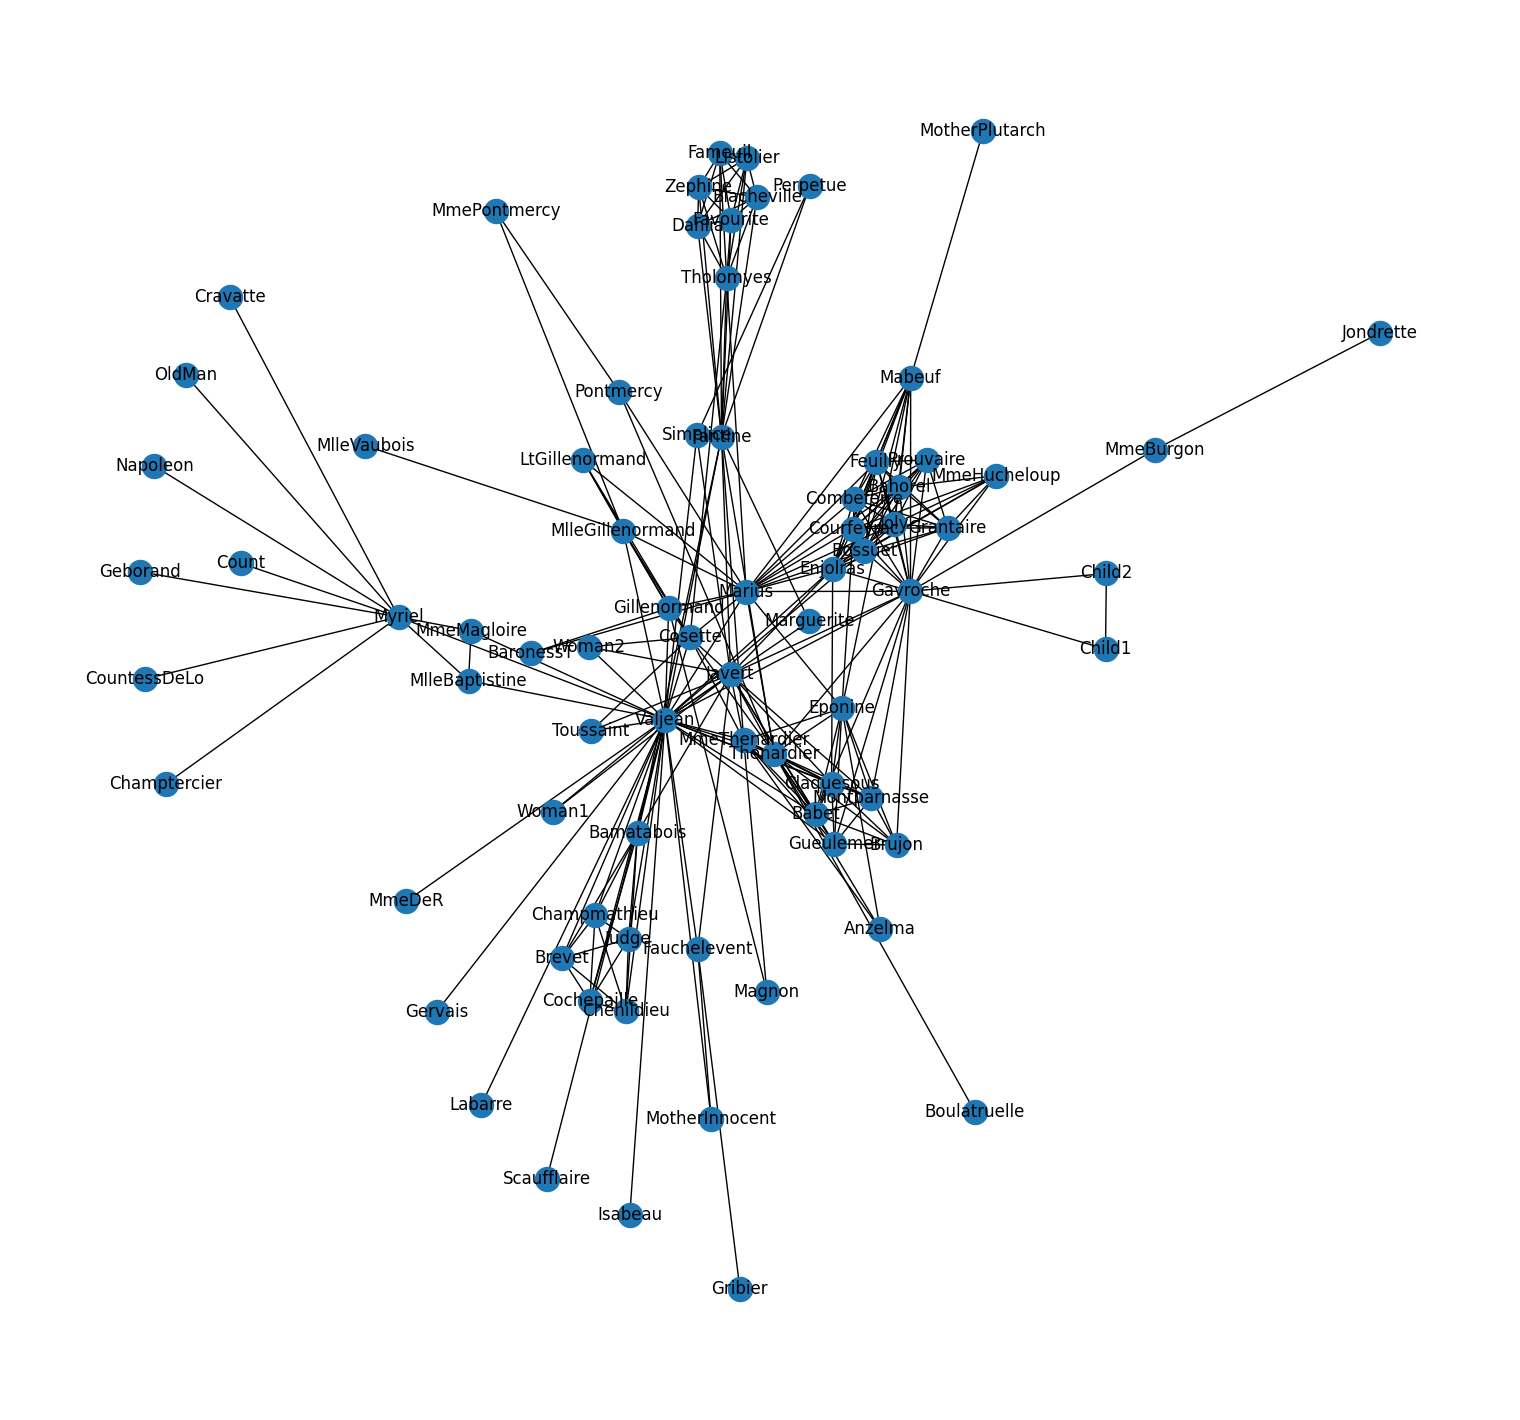

In [3]:
# 《悲惨世界》人物数据集
G = nx.les_miserables_graph()
# G.nodes
# len(G)

# 可视化
plt.figure(figsize=(15, 14))
pos = nx.spring_layout(G, seed=5)
nx.draw(G, pos, with_labels=True)
plt.show()

In [4]:
from node2vec import Node2Vec

node2vec = Node2Vec(
                    G,              #
                    dimensions=32,  # 嵌入维度
                    p=1,            # 回家参数
                    q=6,            # 外出参数
                    walk_length=6,  # 游走长度
                    num_walks=300,  # 游走轮数
                    workers=4       # 并行线程数
                   )

model = node2vec.fit(
                     window=3,      # Skip-Gram窗口大小
                     min_count=1,   # 忽略阈值，出现次数低于此的节点（词）
                     batch_words=4  # 每个线程处理的数据量
                    )

X = model.wv.vectors

X.shape

Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 75/75 [00:00<00:00, 1128.86it/s]

(77, 32)

/home/zhfc/anaconda3/envs/GNN_Node2Vec/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of t

[1 1 1 1 1 0 1 2 0 0 0 1 0 1 1 1 1 1 0 1 1 0 2 2 0 2 2 2 2 2 1 1 1 1 1 1 0
 0 1 0 0 2 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

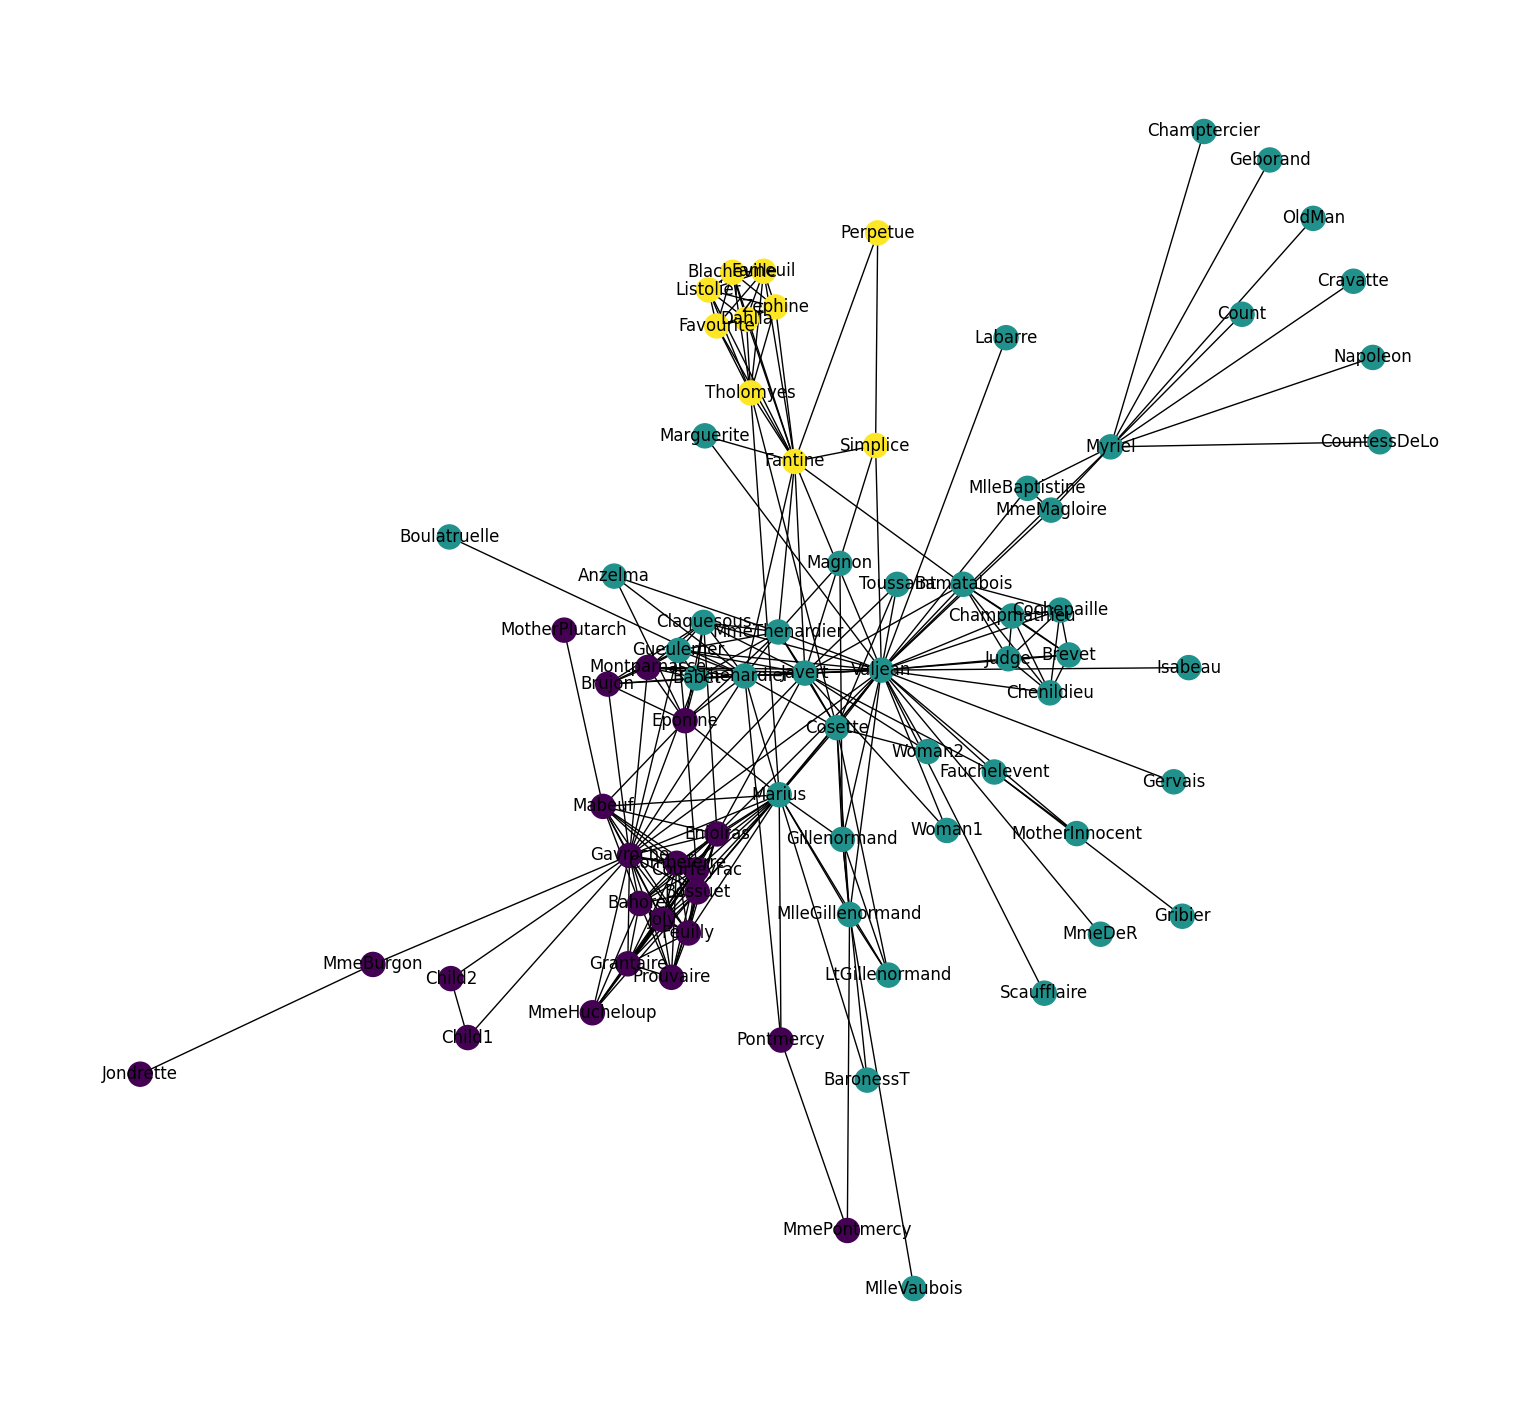

In [5]:
# KMeans聚类
from sklearn.cluster import KMeans
cluster_labels = KMeans(n_clusters=3).fit(X).labels_
print(cluster_labels)

colors = []
nodes = list(G.nodes)
for node in nodes :
    idx = model.wv.key_to_index[str(node)]
    colors.append(cluster_labels[idx])

plt.figure(figsize=(15, 14))
pos = nx.spring_layout(G, seed=10)
nx.draw(G, pos, node_color=colors, with_labels=True)
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

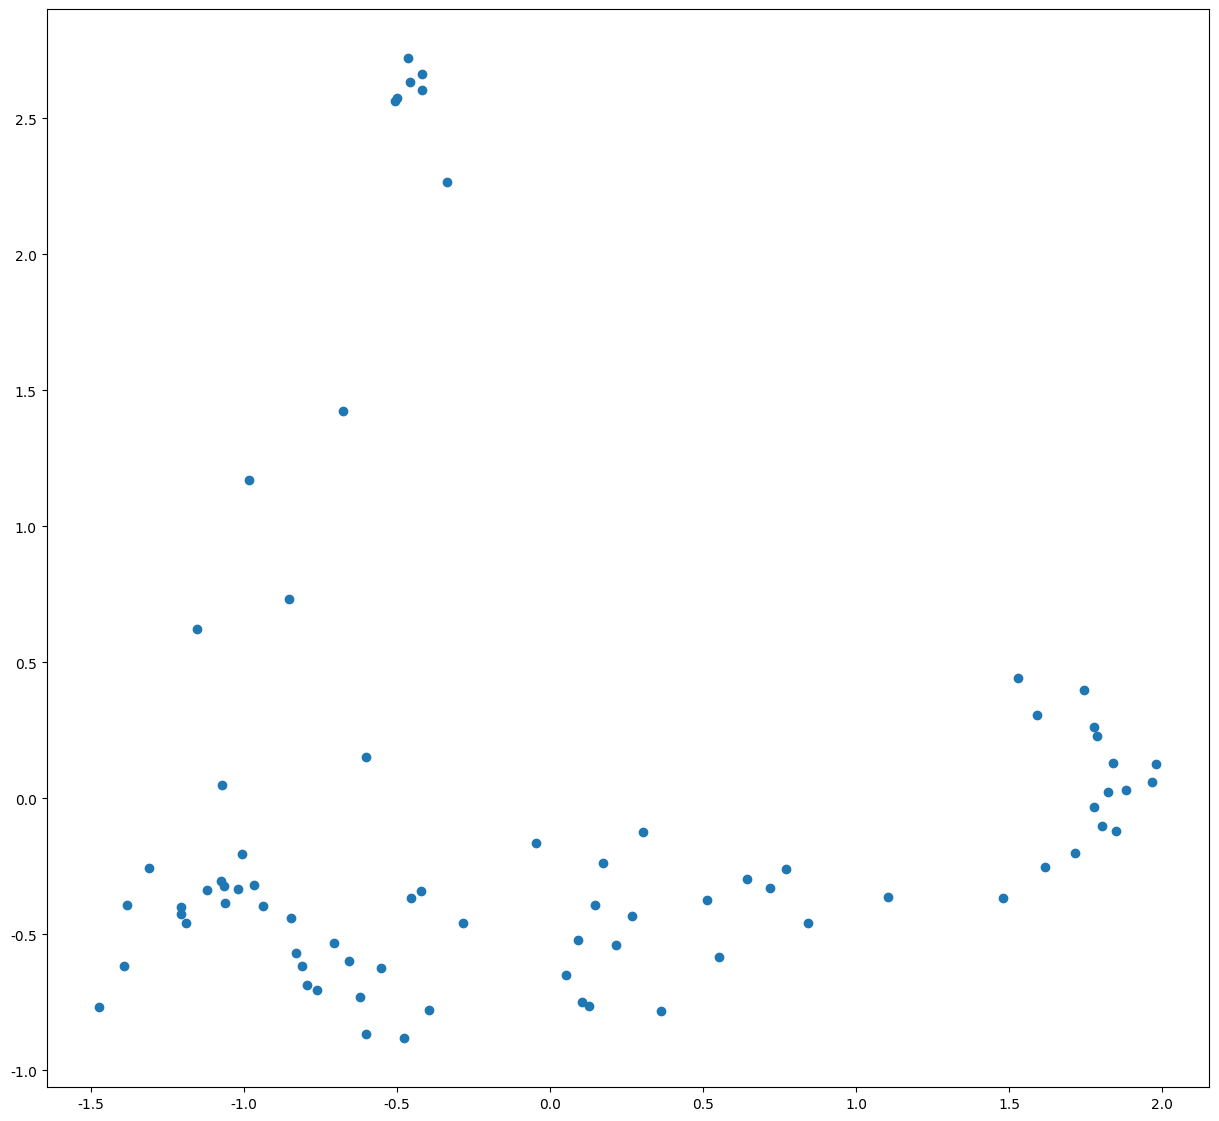

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embed_2d = pca.fit_transform(X)

# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, n_iter=5000)
# embed_2d = tsne.fit_transform(X)

plt.figure(figsize=(15, 14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1])
plt.show()

In [7]:
model.wv.get_vector('Napoleon').shape
model.wv.get_vector('Napoleon')
model.wv.most_similar('Napoleon')
model.wv.similar_by_word('Napoleon')
model.wv.similarity('Napoleon', 'Napoleon')
model.wv.similarity('Napoleon', 'Brujon')
model.wv.similarity('Napoleon', 'Champtercier')

0.95714796

In [8]:
from node2vec.edges import HadamardEmbedder
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)
edges_kv = edges_embs.as_keyed_vectors()
edges_kv.index_to_key

edges_embs[('Napoleon', 'Champtercier')]
edges_kv.most_similar(str(('Bossuet', 'Valjean')))

Generating edge features: 100%|███████| 3003/3003.0 [00:00<00:00, 423805.35it/s]


[("('Bahorel', 'Valjean')", 0.9874643683433533),
 ("('Feuilly', 'Valjean')", 0.9751245379447937),
 ("('Combeferre', 'Valjean')", 0.9646857380867004),
 ("('Grantaire', 'Valjean')", 0.9629843235015869),
 ("('Courfeyrac', 'Valjean')", 0.961979329586029),
 ("('MmeHucheloup', 'Valjean')", 0.9556064009666443),
 ("('Joly', 'Valjean')", 0.9529260993003845),
 ("('Prouvaire', 'Valjean')", 0.9524184465408325),
 ("('Enjolras', 'Valjean')", 0.9512800574302673),
 ("('Mabeuf', 'Valjean')", 0.8494859337806702)]